### ADVANCED STATISTICS FOR PHYSICS ANALYSIS, Physics of Data
###  Student: Matteo Guida 
### ID Number: 1211201

# Sheet 4

## Exercise 1

In [1]:
install.packages('glue')
library(glue)

Installing package into ‘/home/guida/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


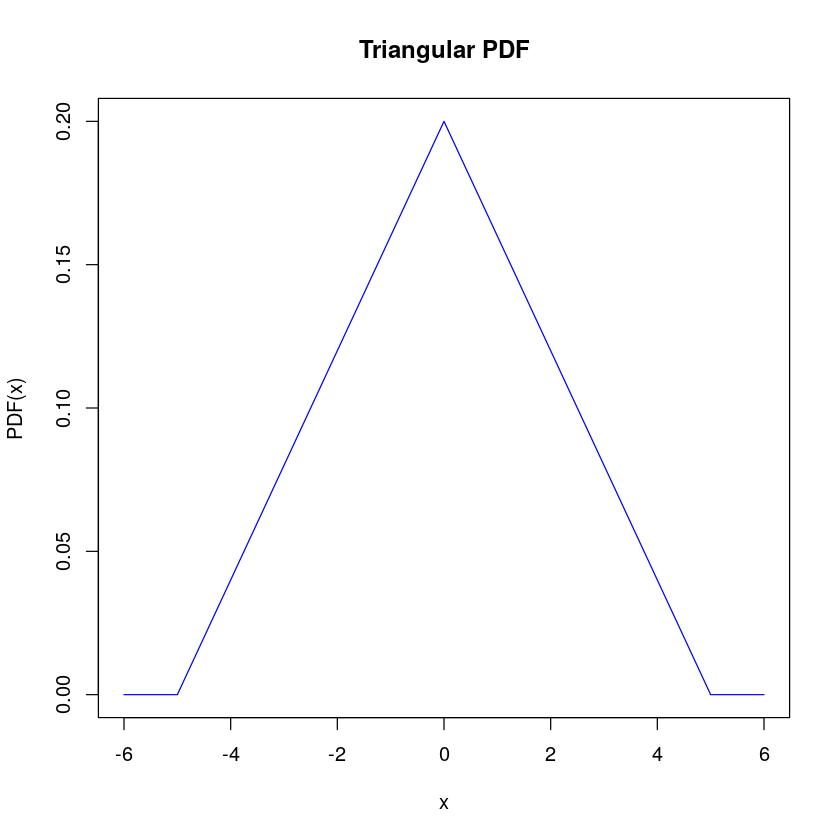

In [2]:
PDF_triangular <-function(x,a=-5,b=5,c=0){
    ifelse(a <= x & x < c, 2*(x-a)/((b-a)*(c-a)), ifelse(c <= x & x <= b, 2*(b-x)/((b-a)*(c-a)), 0))
}
points <- seq(-6,6,0.01)
plot(points,PDF_triangular(points,-5,5,0),type="l", col="blue", xlab="x", ylab="PDF(x)", main="Triangular PDF")

In [3]:
acceptance_rejection <- function(distribution,limit_function, n_points_unif, n) { 
n.accepts     <- 0
data <- rep(NA, n)
  
  while (n.accepts < n) {
    y <- n_points_unif(1)               
    u <- runif(1,0,1)        
    if (u < distribution(y)/(limit_function(y))) {
      n.accepts <- n.accepts+1
      data[n.accepts] = y
    }
  }
  
  data
}

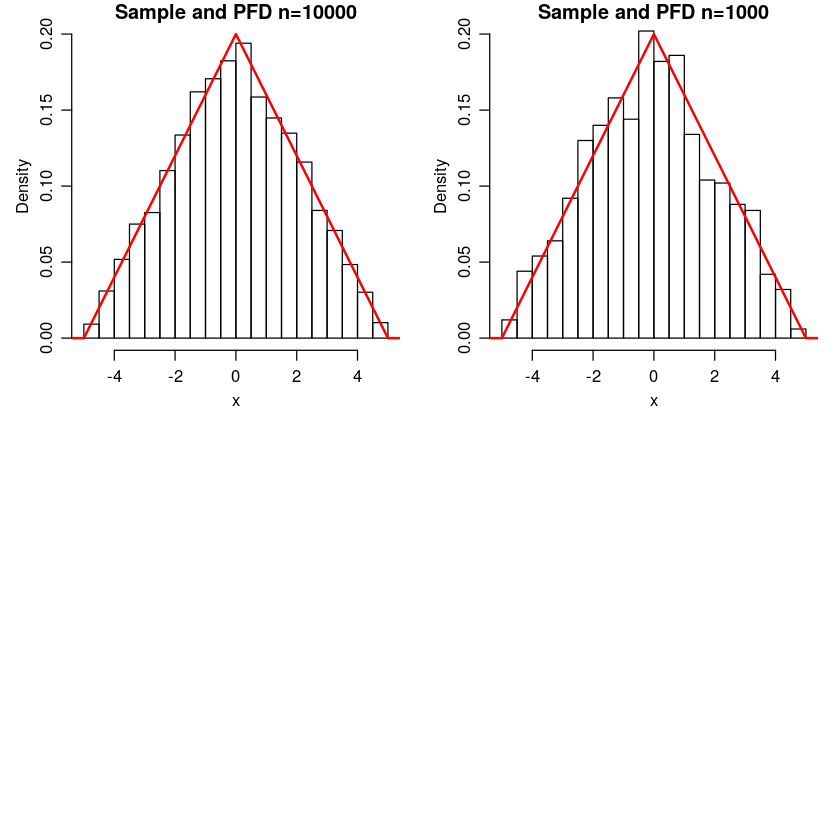

In [4]:
par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
limit_function  <- function(x) 0.25*x/x           
n_points_unif <- function(n) runif(n,-5,5)                   
n0 <-1000
n1 <-10000

vals0 <- acceptance_rejection(PDF_triangular, 1, n_points_unif, 1000) 
vals1 <- acceptance_rejection(PDF_triangular, 1, n_points_unif, 10000) 

hist(vals1, breaks=30, freq=FALSE, main=glue("Sample and PFD n={n1}"),plot = TRUE,ylim=c(0,0.20), xlab="x")
lines(points, PDF_triangular(points), col="red", lwd=2)
hist(vals0, breaks=30, freq=FALSE, main=glue("Sample and PFD n={n0}"),plot = TRUE,ylim=c(0,0.20), xlab="x")
lines(points, PDF_triangular(points), col="red", lwd=2)

## Exercise 2

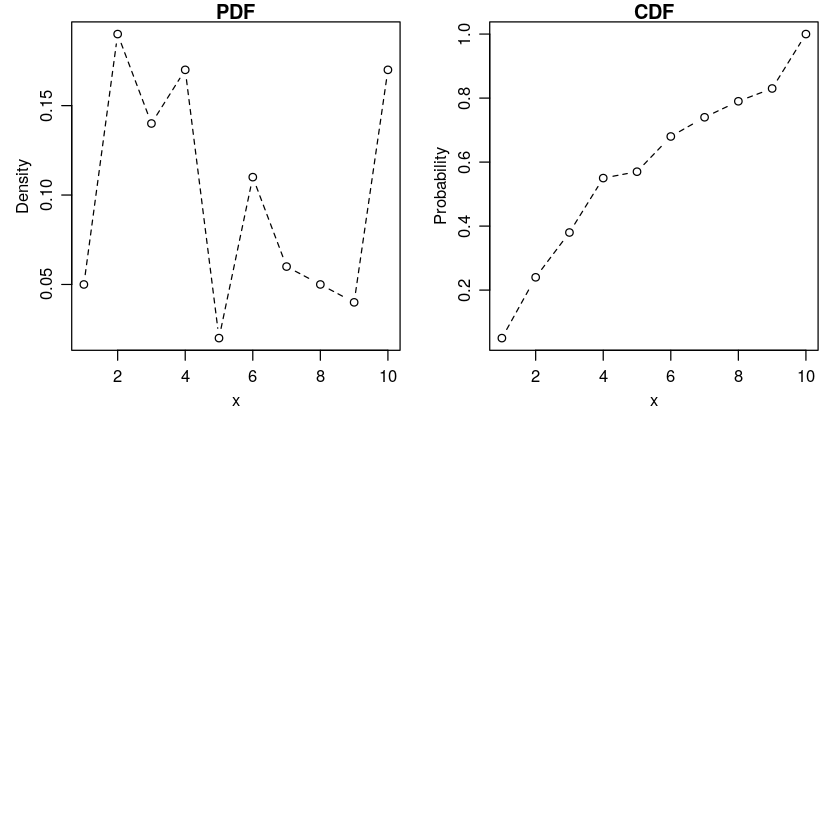

In [5]:
par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
prob  <- c(0.05, 0.19, 0.14, 0.17, 0.02, 0.11, 0.06, 0.05, 0.04, 0.17)
data <-seq(length(prob))
plot(data,prob,type="b", lty=2 ,xlab = 'x', ylab = 'Density', main = 'PDF')
cdf <- cumsum(prob)
plot(data,cdf, type="b", lty=2 ,xlab = 'x', ylab = 'Probability', main = 'CDF')

In [6]:
iter<- 0
generator <- function(number_points=1000){
    data1<-c()
    while (iter < number_points) {
    u <- runif(1)
    index <- which(u < cdf)[1]
    data1[iter]<-index
    iter<- iter+1
    }
    data1
}

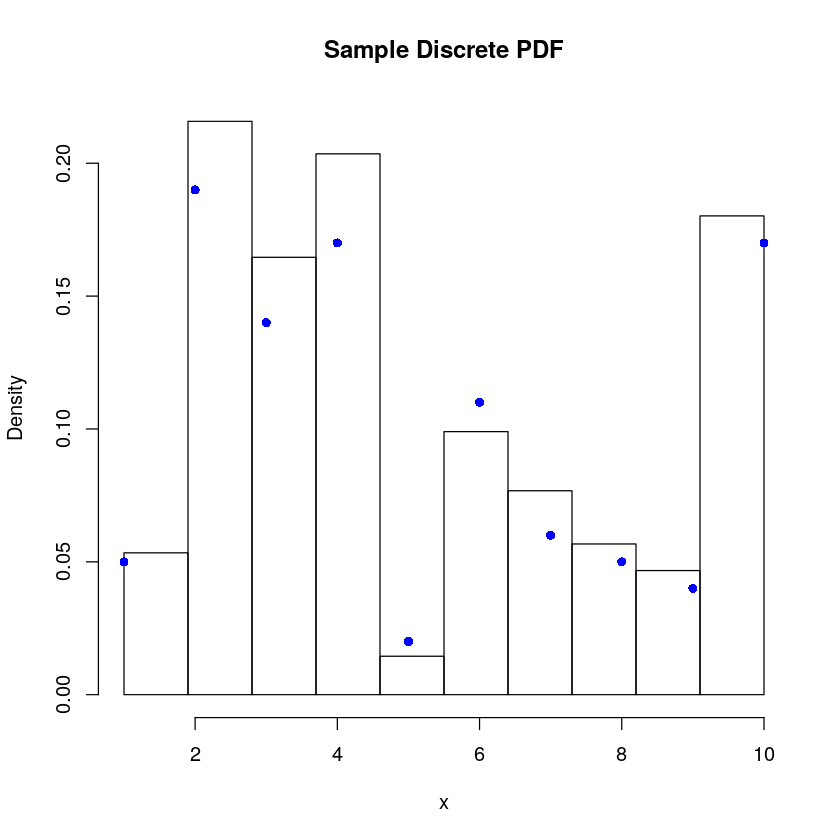

In [7]:
hist(generator(),breaks = seq(min(generator()), max(generator()), length.out = 11), freq=FALSE, main=glue("Sample Discrete PDF"),plot = TRUE,xlab="x")
points(data,prob,col="blue",pch=16)

## Exercise 3

acceptance-rejection algorithm

In [8]:
PDF <- function(x,R=5){
    ifelse(-R < x & x < R, sqrt(R**2-x**2) * 2/(pi*(R**2)),0)    
}

In [9]:
R <- 5
limit_function  <- function(x) 2/(pi*R)         
n_points_unif <- function(n) runif(n,-5,5)  

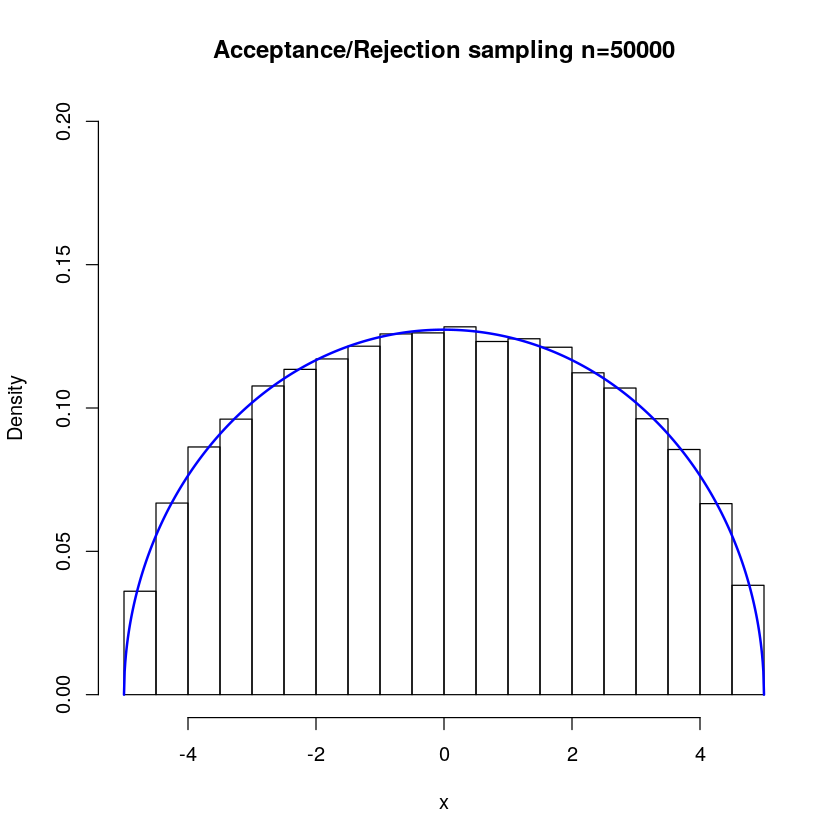

In [10]:
points0 <- seq(-5,5,0.01)
n2<-50000
vals2 <- acceptance_rejection(PDF,limit_function, n_points_unif, n2) 
hist(vals2, breaks=30, freq=FALSE, main=glue("Acceptance/Rejection sampling n={n2}"),plot = TRUE,ylim=c(0,0.20),xlab="x")
lines(points0,PDF(points0), col="blue", lwd=2)

## Exercise 4

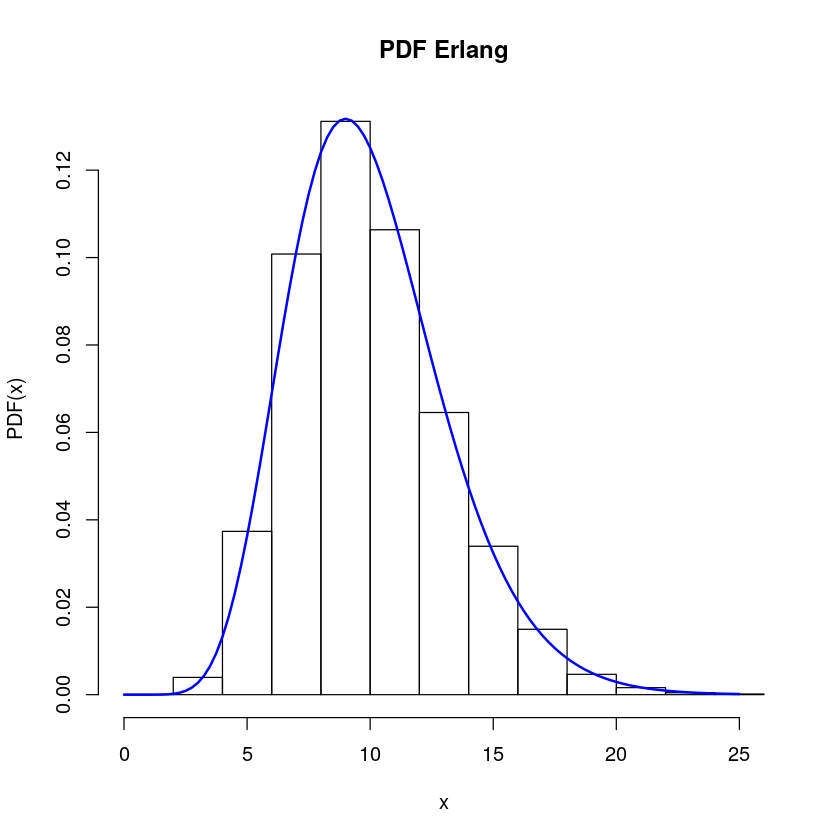

In [11]:
GENERATOR_Erlang <- function(n_points,m,beta=1){
    iter<- 0
    while (iter < n_points) {
    temp <- runif(m)
    data[iter]<--beta*log(prod(temp))
    iter<- iter+1
}
    data
}

hist(GENERATOR_Erlang(10000,10), freq = FALSE, xlab = "x",main = "PDF Erlang",ylab="PDF(x)")
x <- seq(0,25,0.01)
curve(dgamma(x, shape=10,rate = 1), xlim = c(0,max(x)), col = "blue", lw = 2, add = TRUE)

## Exercise 5

In [12]:
GENERATOR_Middle_Square <- function(n_points,number0=9238574357)
    {
    iter<- 0
    data<-c()
    while (iter < n_points) {
    square<-format(number0**2, scientific = FALSE)    
    value<-length(square)
    number0 <- unlist(strsplit(as.character(square),""))
    number.after.trimming<-c(head(tail(number0,length(number0)/2),5), tail(head(number0,length(number0)/2),5))
    number0<-as.numeric(paste(number.after.trimming, collapse="")) 
    data[iter]<-number0
    iter<-iter+1
    }
    data
}

In [13]:
GENERATOR_Middle_Square(10)

[1] 2037266336 3798845412 4273422646 1345614111 5722367733 1679549247 3098288567
[8] 4402939204 4120187363